In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from local_utils import *

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import *
import networkx as nx

from intro import *
import pandas as pd

In [3]:
files = !ls ./inputs/solution_*.pkl

In [4]:
def p(file, n_0=100):
    with open(file, "rb") as f:
        run_params, params, solution = pickle.load(f)
            
    run_params = Struct(**run_params)
    def to(arr):
        return arr.reshape(run_params.Ix, run_params.Jy)
    A_n = to(solution[-1, 0, :])
    B_n = to(solution[-1, 1, :])
    C_n = to(solution[-1, 2, :])

    A_n_1 = to(solution[-2, 0, :])
    B_n_1 = to(solution[-2, 1, :])
    C_n_1 = to(solution[-2, 2, :])
    
    A_0 = to(solution[n_0, 0, :])
    B_0 = to(solution[n_0, 1, :])
    C_0 = to(solution[n_0, 2, :])
    
    kinetics = create_circuit_3954(params["n"],params["b_A"], params["mu_A"], params["V_A"], 
                               params["K_AA"], params["K_AB"], params["K_AC"],
                               params["b_B"], params["mu_B"], params["V_B"], 
                               params["K_BA"], params["K_BC"],
                               params["b_C"], params["mu_C"], params["V_C"], 
                               params["K_CB"], params["K_CC"])
    
    Adj_01, *_ = creat_topology_by_params(kinetics, A_n, B_n, C_n, threshold = 0.05,
                                         **params)
    plot_net(Adj_01)

    plot_n_im([A_n, B_n, C_n], 
              [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
              figsize=(8, 3), shrink=.6); plt.tight_layout();plt.show()
    plot_n_im([A_n_1, B_n_1, C_n_1], 
              [r"$A_{n-1}$", r"$B_{n-1}$", r"$C_{n-1}$"],          
              figsize=(8, 3), shrink=.6); plt.tight_layout();plt.show()

    plot_n_im([A_n-A_n_1, B_n-B_n_1, C_n-C_n_1], 
              [r"$A_{n}-A_{n-1}$", r"$B_{n}-B_{n-1}$", r"$C_{n}-C_{n-1}$"],          
              figsize=(8, 3), shrink=.6); plt.tight_layout();plt.show()
    
    plot_n_im([A_0, B_0, C_0], 
              [r"$A_{0}$", r"$B_{0}$", r"$C_{0}$"],          
              figsize=(8, 3), shrink=.6); plt.tight_layout();plt.show()
    # Check the identifiability of the solution for different thresholds
    def act(x, km, n=2):
        return x**n / (x**n + km**n)

    def inh(x, km, n=2):
        return 1 / (1 + (x / (km + 1e-16)) ** (n))

    (b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, mu_C,
    K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC, n) = (params["b_A"], params["b_B"], params["b_C"], 
                                                   params["V_A"], params["V_B"], params["V_C"],
                                                   params["mu_A"], params["mu_B"], params["mu_C"],
                                                   params["K_AA"], params["K_AB"], params["K_AC"],
                                                   params["K_BA"], params["K_BC"], 
                                                   params["K_CB"], params["K_CC"],
                                                   params["n"])

    
    
    plot_n_im([act(A_n, K_AA, n), inh(B_n, K_BA, n)], 
              [r"act(A, K_AA)", r"inh(B, K_BA)"],
              figsize=(6, 3), shrink=.7); plt.tight_layout();plt.show() 
    plot_n_im([act(A_n, K_AB, n), inh(C_n, K_CB, n)], 
              [r"act(A, K_AB)", r"inh(C, K_CB)"],
              figsize=(6, 3), shrink=.7); plt.tight_layout();plt.show() 
    plot_n_im([inh(A_n, K_AC, n), inh(B_n, K_BC, n), act(C_n, K_CC, n)], 
              [r"inh(A, K_AC)", r"inh(B, K_BC)", r"act(C, K_CC)"],
              figsize=(8, 3), shrink=.6); plt.tight_layout();plt.show()
    


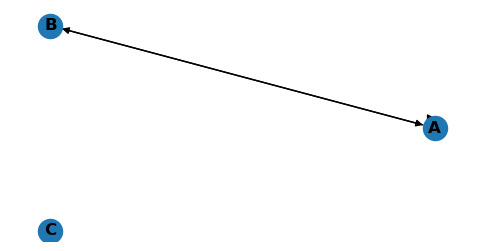

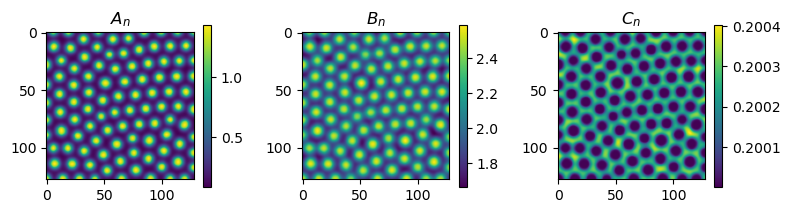

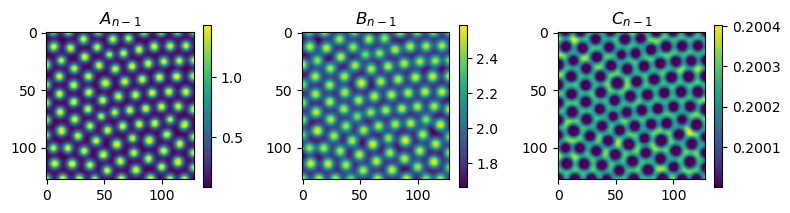

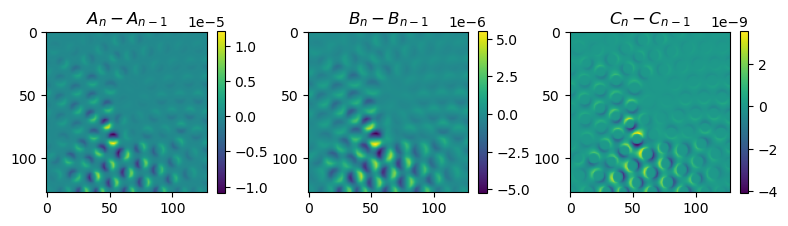

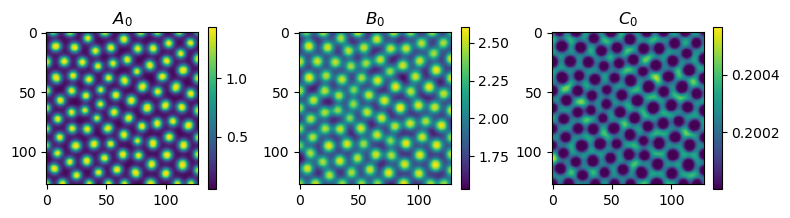

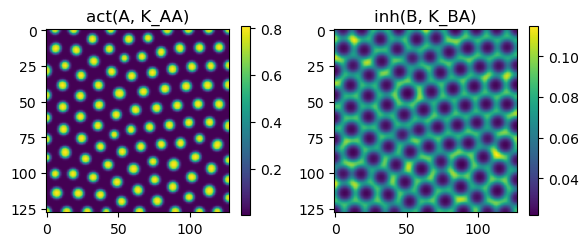

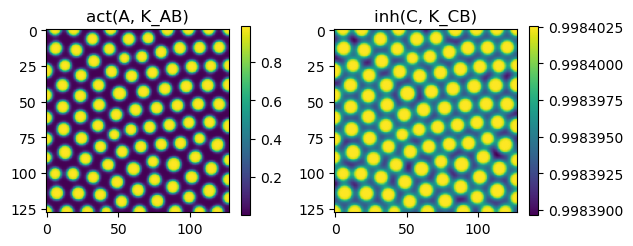

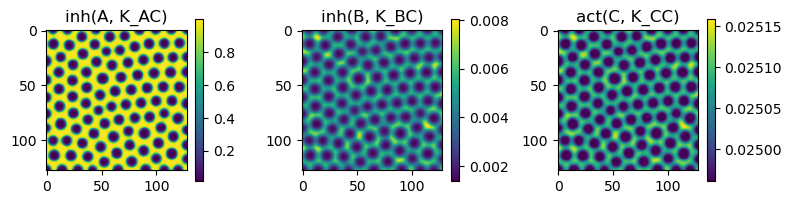

In [5]:
p('./inputs/solution_65.pkl', n_0=100)